# Hochschule Bonn-Rhein-Sieg

# Mathematics for Robotics and Control

# Assignment 1 - Frames

Please enter your or yours and your team member's (if in group) user id below, before submitting the assignment. Also if you are submitting the assignment as a group, only one submission is required. Multiple submissions from the same team will lead to confusion during grading.

#### Author(s) / Team Members : 
- Kabilan Tamilmani (ktamil2s)

This week's assignment is about frames of reference. As you have learned in the lecture, the concept of frames is of great importance in robotics.

Let us consider a mobile robot (e.g. a youBot) that delivers packages in a lab. The robot is equipped with several sensors, including a camera for perceiving its environment and a gripper for grasping objects. You will use your knowledge of frames to help our robot complete its tasks.

Let us first setup this notebook so that figures and plots can be shown in the notebook page. Once you run the following cell, you don't have to import any of the packages in the subsequent code cells, as they will be available to all of them.

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize, getfigs

**Hint**: You might want to check the the NumPy manual [1] before you start. In particular, read and understand the following functions:

```
array()
asarray()
sin()
cos()
tan()
radians()
hstack()
vstack()
dot()
delete()
linalg.inv()
linalg.det()
```

[1] http://docs.scipy.org/doc/numpy/genindex.html

In [2]:
'''Funstions in this cell are commom for all'''
def get_rotation_matrix_z_axis(theta: float) -> np.array:
    Rz = np.array([[np.cos(theta), -np.sin(theta), 0.], 
                   [np.sin(theta), np.cos(theta),  0.], 
                   [0.,            0.,             1.]])
    return Rz

def get_rotation_matrix_x_axis(theta: float) -> np.array:
    Rx = np.array([[1., 0.,             0.], 
                   [0., np.cos(theta), -np.sin(theta)], 
                   [0., np.sin(theta), np.cos(theta)]])
    return Rx

def get_rotation_matrix_y_axis(theta: float) -> np.array:
    Ry = np.array([[np.cos(theta),  0., np.sin(theta)], 
                   [0.,             1., 0.], 
                   [-np.sin(theta), 0., np.cos(theta)]])
    return Ry
def get_rotational_matrix(theta_x:float,theta_y:float,theta_z:float) -> np.array:
    Rx = get_rotation_matrix_x_axis(np.deg2rad(theta_x)) #Rotation about x axis
    Ry = get_rotation_matrix_y_axis(np.deg2rad(theta_y)) #Rotation about y axis
    Rz = get_rotation_matrix_z_axis(np.deg2rad(theta_z)) #Rotation about z axis
    Rzy = np.dot(Rz,Ry)
    R   = np.dot(Rzy,Rx)    #Final Rotational matrix,  Z-Y-X-Euler-angle convention 
    return R
def get_homogenous_transformation_matrix(t: np.array, theta_x:float,theta_y:float,theta_z:float) -> np.array:
    t = t[np.newaxis].T   #translation vector transpose
    R = get_rotational_matrix(theta_x, theta_y, theta_z)
    T = np.hstack((R,t))    #stack rotation matrix and translation vector horizontally
    T = np.vstack((T, np.array([0., 0., 0., 1])))    # stack vertically
    return T

## Picking up a package for the lab [50 points]

The robot's task for today is to go to the reception and pick up a package that is lying on a cabinet. To do so, the robot has to complete a few subtasks.

### Locate the pose of the reception's door relative to the robot's base frame [25 points]

Assume that our robot is located in a hallway that leads to the reception. In order to go inside the reception, the robot needs to know the pose of the door $\{D\}$ relative to the base frame $\{B \}$, i.e. we need the transform ${}^{B}_DT$; however, we are given the pose of the door relative to the camera's frame $\{C\}$, as we are using a camera for detecting the reception's door.

With respect to the camera, the door frame $\{D\}$ is rotated $-13.215^o$ about $Z$ and $-28.647^o$ about $Y$ (this a rotation about $Z$ first, followed by a rotation in $Y$  using the *Z-Y-X*-Euler-angle convention) and has a relative translation of $(1.533, -0.354, 0.197)$ meters in $X,Y$, and $Z$ respectively. We also know the pose of the camera relative to the base, $^{B}_CT$: $\{C\}$ is located $(-0.176, 0.035, 0.563)$ meters away from the base frame and is rotated $28.647^o$ about $\{B\}$'s $Y$ axis.

Observe the following figure for a visual description of the frames. The $X$ axis is represented by the red line, the $Y$ axis by the green line, and the $Z$ axis by the blue line.

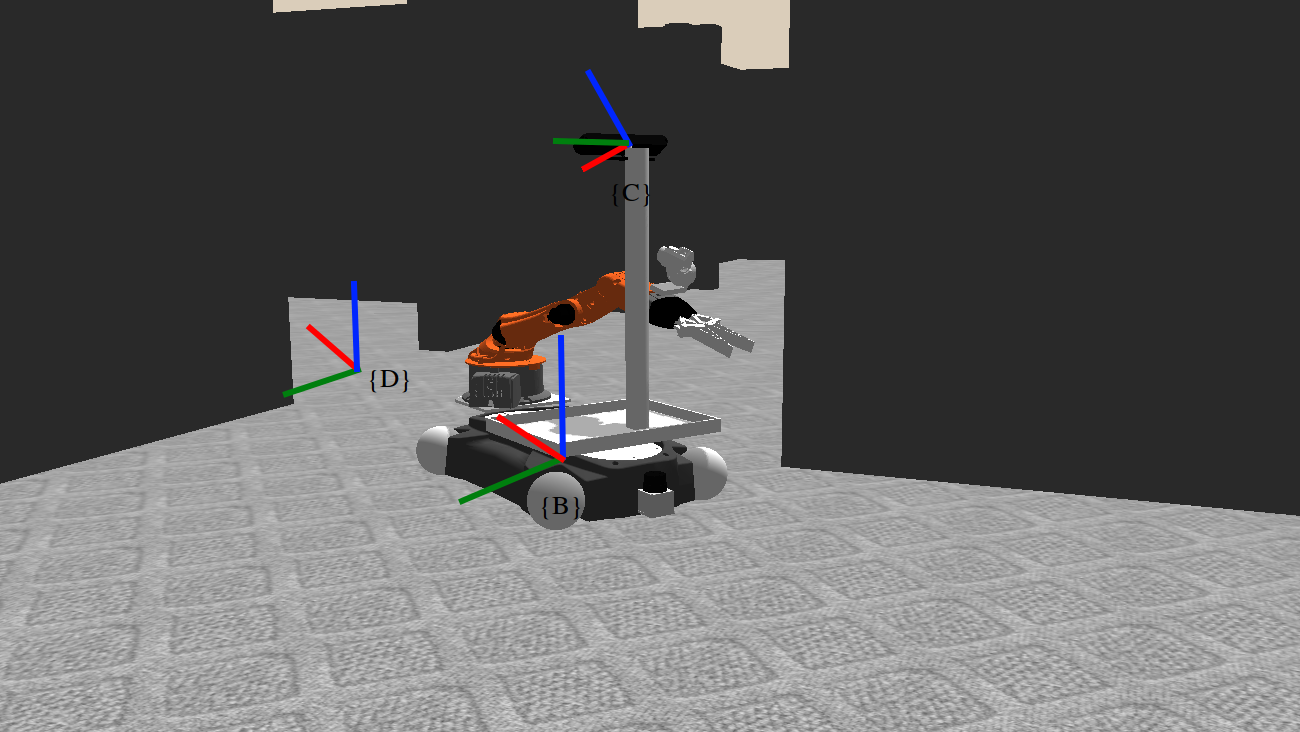

In [3]:
import IPython
IPython.core.display.Image("images/youbot_and_door.png", embed=True)

Calculate $^{B}_DT$ by completing the following function.

In [4]:
def direct_transform() -> np.array:
    '''Returns a homogenous transformation describing
    the pose of frame {D} relative to frame {B}.

    '''
    # YOUR CODE HERE
    
    #Homogenous Transformation matrix of D with respect to C
    D_C_T = get_homogenous_transformation_matrix(t=np.array([1.533,   -0.354,    0.197]),
                                                 theta_x = 0,
                                                 theta_y = -28.647,
                                                 theta_z = -13.215)
    
    #Homogenous Transformation matrix of C with respect to B
    C_B_T = get_homogenous_transformation_matrix(t=np.array([-0.176,   0.035,    0.563]),
                                                 theta_x = 0,
                                                 theta_y = 28.647,
                                                 theta_z = 0)
    
    #Homogenous transformation matrix of D with respect to B
    D_B_T  = np.dot(D_C_T,C_B_T)
    
    #return statement
    return D_B_T
    raise NotImplementedError()

D_B_T = direct_transform()
print("Transformation from D to B")
print(D_B_T)

Transformation from D to B
[[ 9.73519087e-01  2.28605745e-01  5.64124895e-17  1.12787402e+00]
 [-2.28605745e-01  9.73519087e-01  1.69641018e-18 -2.22914613e-01]
 [-1.17199702e-17  0.00000000e+00  1.00000000e+00  6.06706678e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [5]:
### THIS CELL CONTAINS AUTOMATED TESTS OF YOUR SOLUTION; DO NOT DELETE IT!


### Lucy, Take the Noodle Box!  [25 points]

In this task, Lucy has to grasp the noodle box on the counter. It uses an object detection and recognition module for finding the box relative to the camera frame $\{C \}$. The module reports that, relative to frame $\{C\}$, the box is located at $(-0.078, 0.2, 0.7)$ meters in $X, Y$, and $Z$, respectively, and is rotated by $90.0^o$ about $Z$, rotated by $-107.15^o$ about $Y$. This information corresponds to the transform ${}^C_OT$.

The pose of the camera relative to the robot's base, denoted by ${}^B_CT$, is located $(0.02, 0.0, 1.2)$ meters away from the base frame and is rotated $-90.0^o$ about $Z$ and $-107.15^o$ about $X$. Furthermore, using the robot's kinematics, we can calculate ${}^B_GT$, the transform describing the frame of the manipulator's end-effector $\{G\}$ relative to the base frame $\{B\}$; this is given by a translation of $(0.4, 0.078, .85)$ meters in $X, Y$, and $Z$ respectively and a rotation of $-180.0^o$ about $Z$ and a rotation of $-90.0^o$ about $Y$.

For picking up this box, the robot needs to know the package's position and orientation with respect to its end-effector. Your task is to calculate the pose of the noodle box relative to the manipulator's end-effector, namely compute ${}^G_OT$. The following figure shows a description of the frames involved.

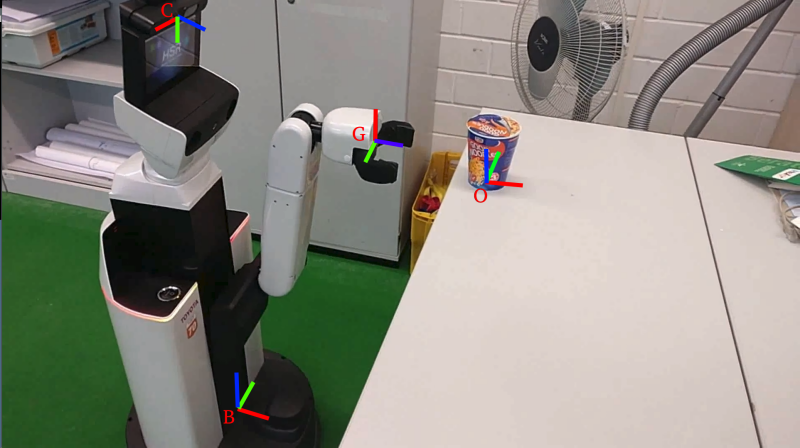

In [6]:
IPython.core.display.Image("images/lucy_grasping.png", embed=True)

Calculate ${}^G_OT$ by completing the following function.

In [7]:
def inverse_transform() -> np.array:
    '''Returns a homogenous transformation describing
    the pose of frame {O} relative to frame {G}.

    '''
    # YOUR CODE HERE
    
    #Homogenous Transformation matrix of O with respect to C
    O_C_T = get_homogenous_transformation_matrix(t=np.array([-0.078, 0.2, 0.7]),
                                                 theta_x = 0,
                                                 theta_y = -107.15,
                                                 theta_z = 90)
    
    #Homogenous Transformation matrix of C with respect to B
    C_B_T = get_homogenous_transformation_matrix(t=np.array([0.02, 0.0, 1.2]),
                                                 theta_x = -107.15,
                                                 theta_y = 0,
                                                 theta_z = -90)
    
    #Homogenous Transformation matrix of G with respect to B
    G_B_T = get_homogenous_transformation_matrix(t=np.array([0.4, 0.078, .85]),
                                                 theta_x = 0,
                                                 theta_y = -90,
                                                 theta_z = -180)
    
    #Homogenous transformation matrix of O with respect to B
    O_B_T  = np.dot(O_C_T,C_B_T)
    
    #Homogenous transformation matrix of B with respect to G
    B_G_T  = np.linalg.inv(G_B_T)
    
    #Homogenous transformation matrix of O with respect to G
    O_G_T  = np.dot(O_B_T,B_G_T)
    
    #return statement
    return O_G_T
    raise NotImplementedError()

O_G_T = inverse_transform()
print("Transformation from O to G")
print(O_G_T)

Transformation from O to G
[[-1.19742048e-16 -7.92881833e-17  1.00000000e+00 -9.28000000e-01]
 [ 1.47883599e-16 -1.00000000e+00 -7.92881833e-17 -8.74540749e-01]
 [ 1.00000000e+00  9.70457603e-17  1.19742048e-16 -3.47384389e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [8]:
### THIS CELL CONTAINS AUTOMATED TESTS OF YOUR SOLUTION; DO NOT DELETE IT!


## Rocket Science [20 points]

It's the year 2069 and you have been chosen by NASA for the 'Alpha Centauri Mission'. The mission objective is to send a probe to the nearest star system 'Alpha Centauri'. The probe needs to maintain its orientation towards the star system at all times. The probe tracks three stars namely 'Alpha Centauri A', 'Sirius' and 'Denebola' (which are conveniently perpendicular to each other with respect to the probe) to correct its trajectory. The probe has multiple cameras placed strategically around the spacecraft to track these stars.

Unfortunately, an asteroid causes the probe to dislodge from its path by offsetting its orientation. To recover from the situation, three cameras are used to track the three stars separately. The ground station receives the data from the probe as follows,
- Camera#1 observes 'Alpha Centauri A' with respect to its frame $\{C_1\}$ at angles $29.87^o$ from its $X$ cooridinate, $66.34^o$ from its $Y$ coordinate and $72.84^o$ from its $Z$ coordinate. 'Alpha Centauri A' is about $4.4$ light years away from the probe.
- Camera#2 observes 'Sirius' with respect to its frame $\{C_2\}$ at angles $19.02^o$ from its $X$ cooridinate, $89.95^o$ from its $Y$ coordinate and $109.02^o$ from its $Z$ coordinate. 'Sirius' is about $8.6$ light years away from the probe.
- Camera#3 observes 'Denebola' with respect to its frame $\{C_3\}$ at angles $23.32^o$ from its $X$ cooridinate, $95.77^o$ from its $Y$ coordinate and $67.49^o$ from its $Z$ coordinate of the frame $\{C_3\}$. 'Denebola' is about $36$ light years away from the probe.

We also know the following information,
- Camera#1 is rotated by $-20^o$ about $Z$, $10^o$ about $Y$ and $-175^o$ about $X$ with respect to the center of the probe.
- Camera#2 is rotated by $50^o$ about $Z$, $12^o$ about $Y$ and $-155^o$ about $X$ with respect to the center of the probe.
- Camera#3 is rotated by $-3^o$ about $Z$, $-70^o$ about $Y$ and $70^o$ about $X$ with respect to the center of the probe.

Since we are observing the stars which are light years away, the translation of the cameras from the center of the probe can be ignored.<br>

Your task is to calculate the orientation error with respect to the stars so that the probe can realign itself. Note that all the rotations follow the Euler convention.

_Hint 1_ : Recall the conversion of polar coordinates to Cartesian coordinates.<br>
_Hint 2_ : Don't forget that rotation matrices are **orthonormal**.

In [9]:
IPython.core.display.Image(url='images/Animation.gif', width=700, height=700) 

Task 1: Obtain the position of the stars w.r.t the cameras.

In [10]:
# YOUR CODE HERE

#Converting Polar to Cartesian Coordinates 
get_Cartestian_from_polar = lambda r, tx,ty,tz : np.array([r*np.cos(tx),
                                                           r*np.cos(ty), 
                                                           r*np.cos(tz)])
#AlphaCentauri with respect to C1
AlphaCentauri_C1 = get_Cartestian_from_polar(4.4, np.deg2rad(29.87), np.deg2rad(66.34), np.deg2rad(72.84))
print("Position of AlphaCentauri with respect to C1 :",AlphaCentauri_C1)

#Sirius with respect to C2
Sirius_C2        = get_Cartestian_from_polar(8.6, np.deg2rad(19.02), np.deg2rad(89.95), np.deg2rad(109.02))
print("Position of Sirius with respect to C2 :", Sirius_C2)

#Denebola with respect to C3
Denebola_C3      = get_Cartestian_from_polar(36., np.deg2rad(23.32), np.deg2rad(95.77), np.deg2rad(67.49))
print("Position of Denebola with respect to C3 :",Denebola_C3)

#raise NotImplementedError()

Position of AlphaCentauri with respect to C1 : [3.81549361 1.76575707 1.2981807 ]
Position of Sirius with respect to C2 : [ 8.13048191e+00  7.50491483e-03 -2.80272437e+00]
Position of Denebola with respect to C3 : [33.05909714 -3.61927314 13.78240826]


In [11]:
### THIS CELL CONTAINS AUTOMATED TESTS OF YOUR SOLUTION; DO NOT DELETE IT!


Task 2: Obtain the position of the stars w.r.t the probe.

In [12]:
# YOUR CODE HERE

#Rotational matrix of C1 with respect to Probe
C1_P_R = get_rotational_matrix(theta_x = -175,
                               theta_y = 10,
                               theta_z = -20)

#Rotational matrix of C2 with respect to Probe
C2_P_R = get_rotational_matrix(theta_x = -155,
                               theta_y = 12,
                               theta_z = 50)

#Rotational matrix of C3 with respect to Probe
C3_P_R = get_rotational_matrix(theta_x = 70,
                               theta_y = -70,
                               theta_z = -3)

#Position of Alpha Centauri with respect to Probe
AlphaCentauri_P = np.dot(C1_P_R,AlphaCentauri_C1)
print("Position of AlphaCentauri with respect to probe :",AlphaCentauri_P)

#Position of Sirius with respect to Probe
Sirius_P = np.dot(C2_P_R,Sirius_C2)
print("Position of Sirius with respect to probe :", Sirius_P)

#Position of Denebola with respect to Probe
Denebola_P = np.dot(C3_P_R,Denebola_C3)
print("Position of Denebola with respect to probe :",Denebola_P)

#raise NotImplementedError()

Position of AlphaCentauri with respect to probe : [ 2.73185433 -2.7458374  -2.08770485]
Position of Sirius with respect to probe : [6.36359229 5.73052466 0.79109832]
Position of Denebola with respect to probe : [  9.31679048 -14.6968363   31.51441317]


In [13]:
### THIS CELL CONTAINS AUTOMATED TESTS OF YOUR SOLUTION; DO NOT DELETE IT!


Task 3: Obtain the angles of rotation to correct the trajectory of the probe. (In radians)

In [14]:
# YOUR CODE HERE 

I_i = np.array([4.4,   0.,     0.]) #X-axis
I_j = np.array([0.,    8.6,    0.]) #Y-axis
I_k = np.array([0.,    0.,    36.]) #Z-axis
#Frame before collision or Frame to which probe has to be aligned
Initial_Frame  = np.vstack((I_i, I_j, I_k)).T

C_i = AlphaCentauri_P   #Probe to Alpha centauri
C_j = Sirius_P          #Probe to Sirius
C_k = Denebola_P        #Probe to Denebola
#Probe Current Frame after collision
Current_Frame   = np.vstack((C_i, C_j, C_k)).T

$$Rotational Matrix * Initial Frame = Current Frame$$

$$\begin{bmatrix} c \alpha c \beta & 
 c \alpha s \beta s \gamma -  s \alpha c \gamma & 
 c \alpha s \beta c \gamma +  s \alpha s \gamma \\ 
 s \alpha c \beta & 
 s \alpha s \beta s \gamma +  c \alpha c \gamma & 
 s \alpha s \beta c \gamma -  c \alpha s \gamma \\
- s \beta & 
 c \beta s \gamma & 
 c \beta c \gamma \end{bmatrix} *
\begin{bmatrix} I_{00} & 0 & 0 \\ 0 & I_{11} & 0 \\ 0 & 0 & I_{22} \end{bmatrix} =
\begin{bmatrix} C_{00} & C_{01} & C_{02} \\ C_{10} & C_{11} & C_{12} \\ C_{20} & C_{21} & C_{22} \end{bmatrix}$$

$$\begin{bmatrix} 
 I_{00}*c \alpha c \beta & 
 I_{11}*c \alpha s \beta s \gamma -  s \alpha c \gamma & 
 I_{22}*c \alpha s \beta c \gamma +  s \alpha s \gamma \\ 
 I_{00}*s \alpha c \beta & 
 I_{11}*s \alpha s \beta s \gamma +  c \alpha c \gamma & 
 I_{22}*s \alpha s \beta c \gamma -  c \alpha s \gamma \\
 I_{00}*-s \beta & 
 I_{11}*c \beta s \gamma & 
 I_{22}*c \beta c \gamma \end{bmatrix} =
\begin{bmatrix} C_{00} & C_{01} & C_{02} \\ C_{10} & C_{11} & C_{12} \\ C_{20} & C_{21} & C_{22} \end{bmatrix}$$

In [15]:
#Rotation Matrix
# R * Initail_Frame = Current_Frame
# Equating corresponding terms
beta  = np.arcsin((Current_Frame[2,0]/(Initial_Frame[0,0]*-1)))           #C(2,0)
alpha = np.arcsin((Current_Frame[1,0]/(Initial_Frame[0,0]*np.cos(beta)))) #C(1,0)
gamma = np.arcsin((Current_Frame[2,1]/(Initial_Frame[1,1]*np.cos(beta)))) #C(2,1)

#R = get_rotational_matrix(theta_x = alpha, theta_y = beta, theta_z = gamma)
#print("Is R a Rotation matrix correct : ",is_rotation_matrix(ro))
#print("Rotation matrix :\n",R)

print("alpha :",alpha)
print("beta  :",beta)
print("gamma :",gamma)

#raise NotImplementedError()

alpha : -0.7879898368740795
beta  : 0.49437136213709254
gamma : 0.1046914309656755


In [16]:
### THIS CELL CONTAINS AUTOMATED TESTS OF YOUR SOLUTION; DO NOT DELETE IT!


Run the code below to verify the solution that you provided.

In [17]:
%matplotlib notebook

<IPython.core.display.Javascript object>


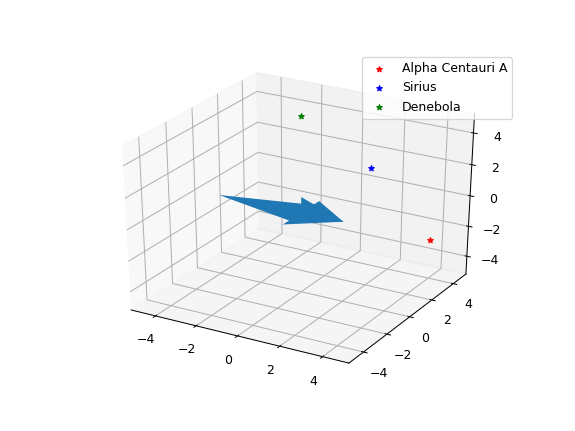

MISSION SUCCESSFUL!!! You are on the right trajectory.


In [18]:
from simulation import Simulation

sim = Simulation('ini_pos.txt', 'fin_pos.txt')


f=sim.euler_continuous(np.rad2deg(alpha), np.rad2deg(beta), np.rad2deg(gamma))
print(f)

## Properties of a rotation matrix [10 points]

Write down and explain the properties of a rotation matrix below.

YOUR ANSWER HERE

### Properties of a Rotation Matrix
1. The determinant of Rotational matix is equal to one
2. The Transpose of Rotational matix and its inverse are equal
3. The dot product of any row or any column in the matrix with itself is equal to one
4. The dot product of any row with any other row of the matrix is equal to zero
5. The dot product of any column with any other column of the matrix is equal to zero

After specifying the mathematical properties of a rotation matrix, complete the following function to determine if a given matrix is a rotation matrix.

In [19]:
def is_rotation_matrix(matrix: np.array) -> bool:
    '''Returns True only if the input matrix is a rotation matrix 
    (based on the properties of a rotation matrix), otherwise it returns False.
    '''
    # YOUR CODE HERE
    result = False
    
    #The determinant of Rotational matix is equal to one
    if round(np.linalg.det(matrix))==1: 
        result = True
    else : return False
    
    #The Transpose of Rotational matix and its inverse are equal
    if np.allclose(matrix.T, np.linalg.inv(matrix), atol=0.001):
        result = True
    else : return False
    
    for row_i in matrix:
        for row_j in matrix:
            if(np.allclose(row_i, row_j)): #Rows are equal
                #The dot product of any row in the matrix with itself is equal to one
                if round(np.dot(row_i,row_j)) == 1 : 
                    result = True
                else : return False
            else:    #Rows are differnt
                #The dot product of any row with any other row of the matrix is equal to zero
                if round(np.dot(row_i,row_j)) == 0 : 
                    result = True
                else : return False
                
    for col_i in matrix.T:
        for col_j in matrix.T:
            if(np.allclose(col_i, col_j, atol=0.001)): #Column are equal
                #The dot product of any column in the matrix with itself is equal to one
                if round(np.dot(col_i,col_j)) == 1 : 
                    result = True
                else : return False
            else: #Column are different
                #The dot product of any column with any other column of the matrix is equal to zero
                if round(np.dot(col_i,col_j)) == 0 : 
                    result = True
                else : return False
                
    return result
    raise NotImplementedError()

In [20]:
### THIS CELL CONTAINS AUTOMATED TESTS OF YOUR SOLUTION; DO NOT DELETE IT!


## Read the course rules on LEA for submission details